In [281]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt  
from sklearn.model_selection import cross_val_score
from datetime import datetime, date
import calendar

In [2]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [267]:
class Data():
    def __init__(self,country):
        self.country = country
        self.confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
        self.deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
        self.recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
        if(country == "World Wide"):
            self.PreparaDataGlobal()
        else:
            self.PreparaData()

    def PreparaData(self):
        confirmedPortugal = self.confirmed[ self.confirmed['Country/Region'] != self.country].index
        self.confirmed.drop(confirmedPortugal , inplace=True)
        deathsPortugal = self.deaths[ self.deaths['Country/Region'] != self.country].index
        self.deaths.drop(deathsPortugal , inplace=True)
        recoveredPortugal = self.recovered[ self.recovered['Country/Region'] != self.country].index
        self.recovered.drop(recoveredPortugal , inplace=True)
        self.confirmed = self.confirmed.drop(columns=['Province/State','Country/Region','Lat','Long'])
        self.deaths = self.deaths.drop(columns=['Province/State','Country/Region','Lat','Long'])
        self.recovered = self.recovered.drop(columns=['Province/State','Country/Region','Lat','Long'])
        timesteps = []
        total_infetados = []
        total_Days = []
        total_Deaths = []
        total_Recovered = []
        daily_deaths=[]
        daily_cases=[]
        day_of_week=[]
        self.new_dataset = pd.DataFrame()
        Ground_Zero = dt.strptime('12/31/19','%m/%d/%y')
        for cols in self.confirmed.columns:
            timesteps.append(cols)
            total_infetados.append(self.confirmed[cols].sum())
            current_date = dt.strptime(cols,'%m/%d/%y')
            day_of_week.append(current_date.weekday())
            days_Gone = current_date - Ground_Zero
            total_Days.append(int(days_Gone.days))
            daily_cases.append(self.confirmed[cols].sum()-sum(daily_cases))
        for cols in self.deaths.columns:
            total_Deaths.append(self.deaths[cols].sum())
            daily_deaths.append(self.deaths[cols].sum()-sum(daily_deaths))
        for cols in self.recovered.columns:
            total_Recovered.append(self.recovered[cols].sum())
        self.new_dataset['Total_Cases'] = total_infetados
        self.new_dataset['Daily_Cases'] = daily_cases
        self.new_dataset['WeekDay'] = day_of_week
        self.new_dataset['Daily_Deaths'] = daily_deaths
        self.new_dataset['Total_Recovered'] = total_Recovered
        self.new_dataset['Total_Deaths'] = total_Deaths
        self.new_dataset['Days_Gone'] = total_Days
        pd.DataFrame.to_csv(self.new_dataset,'Dados/new_dataset.csv',index=False)
    def PreparaDataGlobal(self):
        self.confirmed = self.confirmed.drop(columns=['Province/State','Country/Region','Lat','Long'])
        self.deaths = self.deaths.drop(columns=['Province/State','Country/Region','Lat','Long'])
        self.recovered = self.recovered.drop(columns=['Province/State','Country/Region','Lat','Long'])
        timesteps = []
        total_infetados = []
        total_Days = []
        total_Deaths = []
        total_Recovered = []
        self.new_dataset = pd.DataFrame()
        Ground_Zero = dt.strptime('12/31/19','%m/%d/%y')
        for cols in self.confirmed.columns:
            timesteps.append(cols)
            total_infetados.append(self.confirmed[cols].sum())
            current_date = dt.strptime(cols,'%m/%d/%y')
            days_Gone = current_date - Ground_Zero
            total_Days.append(int(days_Gone.days))
        for cols in self.deaths.columns:
            total_Deaths.append(self.deaths[cols].sum())
        for cols in self.recovered.columns:
            total_Recovered.append(self.recovered[cols].sum())
        self.new_dataset['Total_Cases'] = total_infetados
        self.new_dataset['Total_Recovered'] = total_Recovered
        self.new_dataset['Total_Deaths'] = total_Deaths
        self.new_dataset['Days_Gone'] = total_Days
        pd.DataFrame.to_csv(self.new_dataset,'Dados/new_dataset.csv',index=False)

In [297]:
dados = Data('US')

In [298]:
dados.new_dataset=dados.new_dataset[dados.new_dataset['Total_Cases']>0]
dados.new_dataset

,Total_Cases,Daily_Cases,WeekDay,Daily_Deaths,Total_Recovered,Total_Deaths,Days_Gone
0,1,1,2,0,0,0,22
1,1,0,3,0,0,0,23
2,2,1,4,0,0,0,24
3,2,0,5,0,0,0,25
4,5,3,6,0,0,0,26
...,...,...,...,...,...,...,...
145,2114026,19968,0,395,576334,116127,167
146,2137731,23705,1,836,583503,116963,168
147,2163290,25559,2,754,592191,117717,169
148,2191052,27762,3,717,599115,118434,170


In [299]:
class Linear_Regression():
    def __init__(self,data):
        self.dataset = data
        self.dataset = np.asarray(self.dataset)
        #self.NormalizeData()
        self.PrepareData()
        self.Fit()
        
    def PrepareData(self):
        self.x_train, self.x_test,self.y_train, self.y_test = train_test_split(self.dataset[:,-1],self.dataset[:,0], test_size=0.1)
    def Fit(self):
        
        #self.ridge = linear_model.Ridge(alpha=.001,max_iter=1000)
        #self.ridge.fit(np.reshape(self.x_train,(-1,1)), self.y_train)
        
        self.lasso = linear_model.Lasso(alpha=1,max_iter=2000)
        self.lasso.fit(np.reshape(self.x_train,(-1,1)), self.y_train)
        
        
        #self.regressor = LinearRegression()  
        #self.regressor.fit(np.reshape(self.x_train,(-1,1)),self.y_train) #training the algorithm
    def NormalizeData(self):
        self.scaler = MinMaxScaler(feature_range=(-1, 1))
        self.dataset = self.scaler.fit_transform(self.dataset)
        #print(self.normalized)
    def ComparePredictions(self):
        self.y_pred = self.lasso.predict(np.reshape(self.x_test,(-1,1)))
        count = 0
        test = np.asarray(self.y_test)
        for i in self.y_pred:
            print('Predicted:' + str(i)+ '===== Real:' +str(test[count]) )
            count +=1
        print('Mean Absolute Error:', metrics.mean_absolute_error(self.y_test, self.y_pred))
        #print('Mean Squared Error:', metrics.mean_squared_error(self.y_test, y_pred))



In [300]:
Model = Linear_Regression(dados.new_dataset)

In [301]:

                             
Model.lasso.score(np.reshape(Model.x_train,(-1,1)),np.reshape(Model.y_train,(-1,1)))

0.8874987618298936

In [302]:
Model.ComparePredictions()

Predicted:1799594.0639681597===== Real:2023590
Predicted:1300267.0633972245===== Real:1374914
Predicted:318257.2956077189===== Real:2870
Predicted:1633151.7304445147===== Real:1816476
Predicted:218391.89549353183===== Real:451
Predicted:1017315.0964070279===== Real:940829
Predicted:-513954.37201050634===== Real:2
Predicted:1400132.4635114116===== Real:1514839
Predicted:-181069.7049632162===== Real:13
Predicted:-497310.13865814183===== Real:2
Predicted:235036.12884589634===== Real:519
Predicted:-64560.07149666478===== Real:13
Predicted:334901.5289600834===== Real:2968
Predicted:1266978.5966924955===== Real:1334084
Predicted:534632.3291884575===== Real:102254
Mean Absolute Error: 235289.77624116253


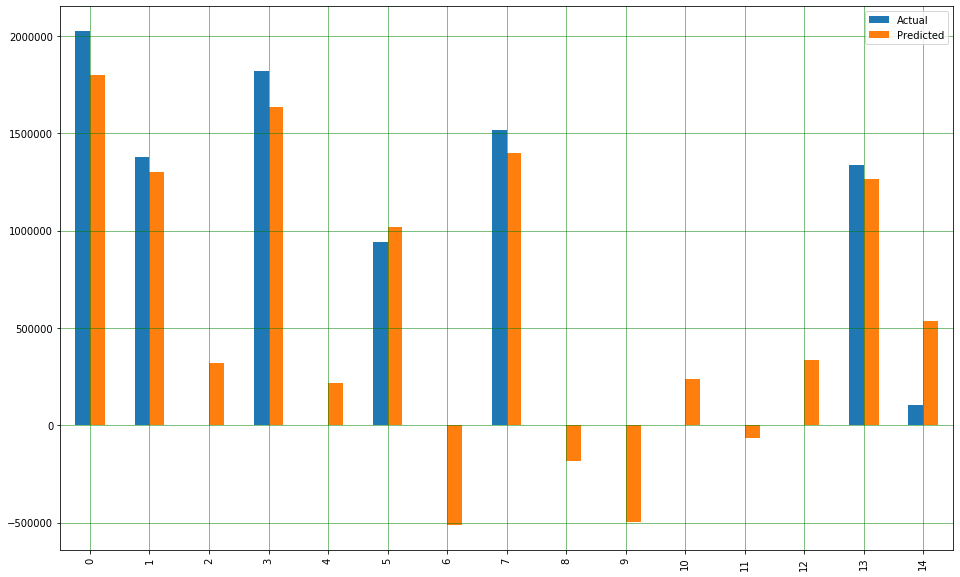

In [303]:
df = pd.DataFrame({'Actual': Model.y_test.flatten(), 'Predicted': Model.y_pred.flatten()})
df

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [304]:
Model.y_test

array([2023590, 1374914,    2870, 1816476,     451,  940829,       2,
       1514839,      13,       2,     519,      13,    2968, 1334084,
        102254], dtype=int64)

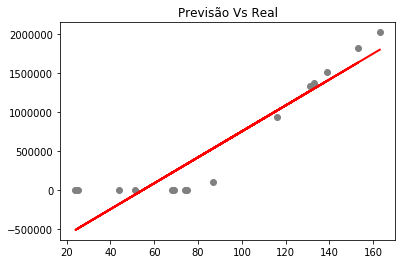

In [305]:
plt.scatter(Model.x_test, Model.y_test,  color='gray')
plt.plot(Model.x_test, Model.y_pred, color='red', linewidth=2)
plt.title('Previsão Vs Real')
plt.show()

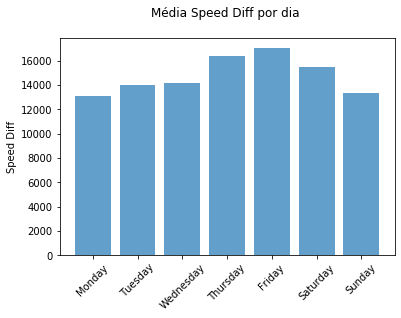

In [306]:
df_totalCases= dados.new_dataset.groupby('WeekDay').mean()
df_totalCases=df_totalCases['Daily_Cases']
dia = []
for i in range(0,7):
    dia = dia + [str(calendar.day_name[i])]
df_totalCases.index=dia
df_totalCases
def Grafico_SpeedDiff_por_dia(df):
    fig, ax = plt.subplots()
    plt.bar(df.index, df, align='center', alpha=0.7)
    
    plt.title('Média Speed Diff por dia \n')
    plt.ylabel("Speed Diff")
    plt.xticks(rotation=45)
    plt.show()
    #fig.savefig("Imagens/Speed_Diff_Dia.png")

Grafico_SpeedDiff_por_dia(df_totalCases)

In [307]:
df_totalCases= dados.new_dataset.groupby('WeekDay').mean()
df_totalCases=df_totalCases['Daily_Cases']
df_totalCases

WeekDay
0    13078.238095
1    14013.000000
2    14171.227273
3    16364.227273
4    17021.227273
5    15510.952381
6    13336.571429
Name: Daily_Cases, dtype: float64